In [497]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import os
from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

import itertools

ModuleNotFoundError: No module named 'pmdarima'

In [417]:
df = pd.read_csv('./data/data_extracted.csv', encoding='cp949')

In [419]:
df

대여일자  대여시간  대여소번호           대여소명 대여구분코드 성별 연령대코드  이용건수  \
0      2018-11-01 0:00     0   1308  안암로터리 버스정류장 앞    정기권  M   20대     2   
1      2018-11-01 0:00     1   1308  안암로터리 버스정류장 앞    정기권  M   20대     1   
2      2018-11-01 0:00     2   1308  안암로터리 버스정류장 앞    정기권  M   20대     1   
3      2018-11-01 0:00     3   1308  안암로터리 버스정류장 앞    일일권  F   20대     1   
4      2018-11-01 0:00     6   1308  안암로터리 버스정류장 앞    정기권  F   20대     1   
...                ...   ...    ...            ...    ... ..   ...   ...   
59915       2019-02-27    17   1308  안암로터리 버스정류장 앞    정기권  F   30대     1   
59916       2019-02-27    17   1308  안암로터리 버스정류장 앞    정기권  M   20대     2   
59917       2019-02-27    17   1308  안암로터리 버스정류장 앞    정기권  M   40대     2   
59918       2019-02-27    18   1308  안암로터리 버스정류장 앞    정기권  M   20대     1   
59919       2019-02-27    19   1308  안암로터리 버스정류장 앞    정기권  F   20대     2   

           운동량    탄소량      이동거리  이동시간  
0        82.83   0.62    2660.0    15  
1      3152.36  24.62  106140.0     6  
2        42.17   0.35    1500.0    12  
3        97.04   0.87    3770.0    19  
4        33.98   0.36    1560.0    11  
...        ...    ...       ...   ...  
59915    29.19   0.31    1340.0     6  
59916   153.35   1.31    5640.0    28  
59917   152.74   1.29    5550.0    25  
59918    62.65   0.52    2260.0    20  
59919   243.75   2.27    9800.0    58  

[59920 rows x 12 columns]

In [420]:
df['대여일자'] = [data[:10] for data in df['대여일자']]

### 일별 대여량 count

In [421]:
df = df.rename(columns={'대여일자': 'date', '대여시간': 'time'})
df = df.sort_values(['date', 'time']).reset_index(drop=True)

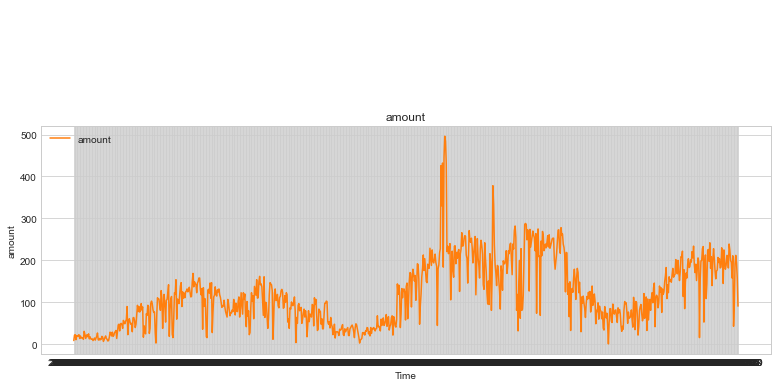

In [412]:
df = rental
plt.rc('font', size=10)
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(df.amount, color='tab:orange', label='amount')
ax.set_xlabel('Time')
ax.set_ylabel("amount")
ax.set_title('amount')
ax.legend(loc='upper left')

plt.suptitle(" ", fontsize=15)
fig.tight_layout(pad=5)
plt.show()

In [413]:
#df = df.iloc[df[df['date']=='2018-01-01'].index[0]:df[df['date']=='2019-12-31'].index[0], :].reset_index(drop=True)

In [422]:
df

date  time  대여소번호           대여소명 대여구분코드   성별 연령대코드  이용건수     운동량  \
0      2018-01-01     2   1308  안암로터리 버스정류장 앞    정기권    M   40대     1   51.75   
1      2018-01-01     6   1308  안암로터리 버스정류장 앞    일일권    F   20대     1    88.8   
2      2018-01-01     6   1308  안암로터리 버스정류장 앞    일일권    M   20대     1   105.2   
3      2018-01-01     9   1308  안암로터리 버스정류장 앞    정기권    M   20대     1   17.25   
4      2018-01-01    15   1308  안암로터리 버스정류장 앞    일일권    F   30대     1  223.42   
...           ...   ...    ...            ...    ...  ...   ...   ...     ...   
59915  2020-06-30    22   1308  안암로터리 버스정류장 앞    정기권    M   20대     1       0   
59916  2020-06-30    22   1308  안암로터리 버스정류장 앞    정기권    M   30대     1  191.25   
59917  2020-06-30    22   1308  안암로터리 버스정류장 앞    일일권    M   30대     1   36.69   
59918  2020-06-30    23   1308  안암로터리 버스정류장 앞    정기권    M   20대     1       0   
59919  2020-06-30    23   1308  안암로터리 버스정류장 앞    일일권  NaN   20대     1   24.74   

        탄소량     이동거리  이동시간  
0      0.42  1790.00    10  
1       0.8  3450.00    22  
2       0.8  3450.00    19  
3      0.16   670.00     2  
4      2.01  8680.00    49  
...     ...      ...   ...  
59915     0     0.00     5  
59916  1.72  7430.00    35  
59917  0.26  1130.00     5  
59918     0     0.00     7  
59919  0.21   892.55     5  

[59920 rows x 12 columns]

In [425]:
rental = pd.DataFrame(df['이용건수'].groupby(df['date']).sum())
rental = rental.rename(columns={'이용건수':'amount'})
rental = rental
#rental.to_csv('./daily_rental_amount_all.csv', encoding='utf-8')

In [426]:
len(set(df.date))

898

결측치 없음

In [386]:
#rental.to_csv('./daily_rental_amount.csv', encoding='utf-8')

## Outlier

In [604]:
df = pd.read_csv('./daily_rental_amount.csv')
df.set_index(df['date'], inplace=True)
df = df.drop('date', axis=1)
df

amount
date              
2018-01-01       9
2018-01-02      22
2018-01-03      23
2018-01-04      11
2018-01-05      21
...            ...
2019-12-26      91
2019-12-27      81
2019-12-28      79
2019-12-29      61
2019-12-30      77

[715 rows x 1 columns]

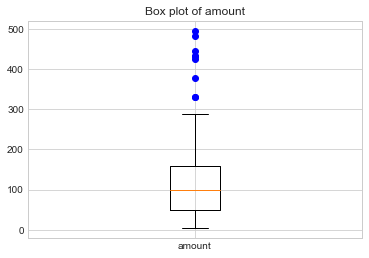

In [605]:
# setting outlier symbol, title, xlabel
plt.boxplot(df, sym="bo")
plt.title('Box plot of amount')
plt.xticks([1], ['amount'])
plt.show()

In [606]:
from collections import Counter 

def detect_outliers(df, features): 
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index        
      
    return outlier_list_col    

Outliers_to_drop = detect_outliers(df, ['amount'])

In [607]:
Outliers_to_drop

Index(['2019-05-24', '2019-05-25', '2019-05-26', '2019-05-28', '2019-05-29',
       '2019-05-30', '2019-05-31', '2019-08-02', '2019-08-03'],
      dtype='object', name='date')

In [608]:
def outlier_replace(data, Outliers_to_drop):
    data_new = data.copy()
    for outlier in Outliers_to_drop:
        outlier_before = pd.to_datetime(outlier)+timedelta(days=-1)
        outlier_before = outlier_before.strftime('%Y-%m-%d')
        outlier_after = pd.to_datetime(outlier)+timedelta(days=1)
        outlier_after = outlier_after.strftime('%Y-%m-%d')
        data_new[data_new.index == outlier] = (data_new[data_new.index == outlier_before]['amount'].values[0]+data_new[data_new.index == outlier_after]['amount'].values[0])/2
        
    return data_new

In [609]:
df_new = outlier_replace(df, Outliers_to_drop)

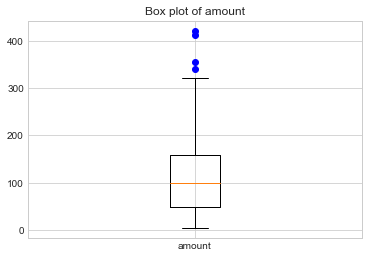

In [610]:
# setting outlier symbol, title, xlabel
plt.boxplot(df_new, sym="bo")
plt.title('Box plot of amount')
plt.xticks([1], ['amount'])
plt.show()

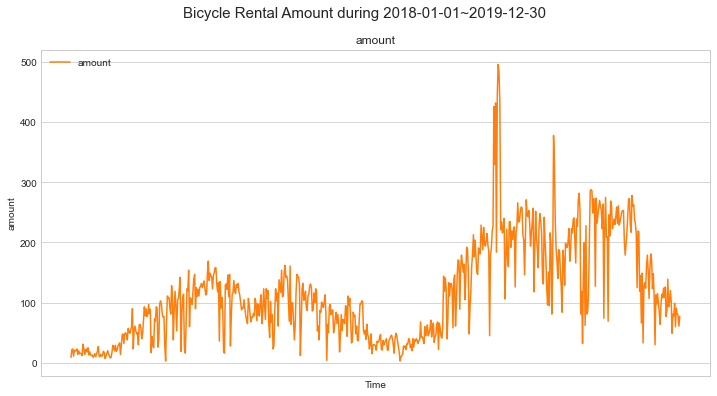

In [611]:
plt.rc('font', size=10)
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(df.amount, color='tab:orange', label='amount')
ax.set_xlabel('Time')
#plt.xticks(df.index, rotation=70)
plt.xticks([], rotation=70)
ax.set_ylabel(df.columns[0])
ax.set_title('amount')
ax.legend(loc='upper left')

plt.suptitle("Bicycle Rental Amount during "+str(df.index[0])+'~'+str(df.index[-1:][0]), fontsize=15)
plt.show()

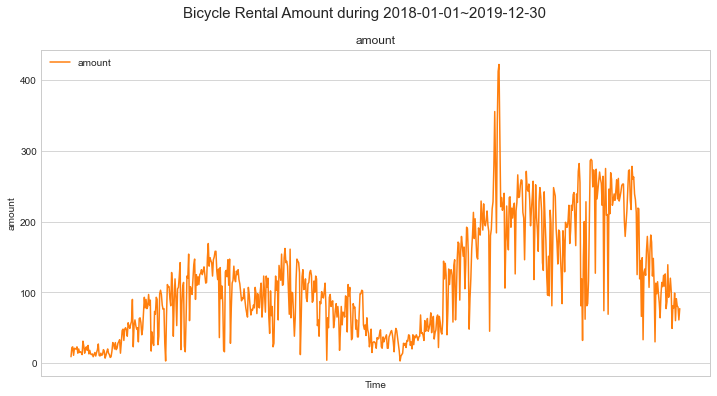

In [612]:
plt.rc('font', size=10)
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(df_new.amount, color='tab:orange', label='amount')
ax.set_xlabel('Time')
#plt.xticks(df.index, rotation=70)
plt.xticks([], rotation=70)
ax.set_ylabel(df.columns[0])
ax.set_title('amount')
ax.legend(loc='upper left')

plt.suptitle("Bicycle Rental Amount during "+str(df.index[0])+'~'+str(df.index[-1:][0]), fontsize=15)
plt.show()

## EDA

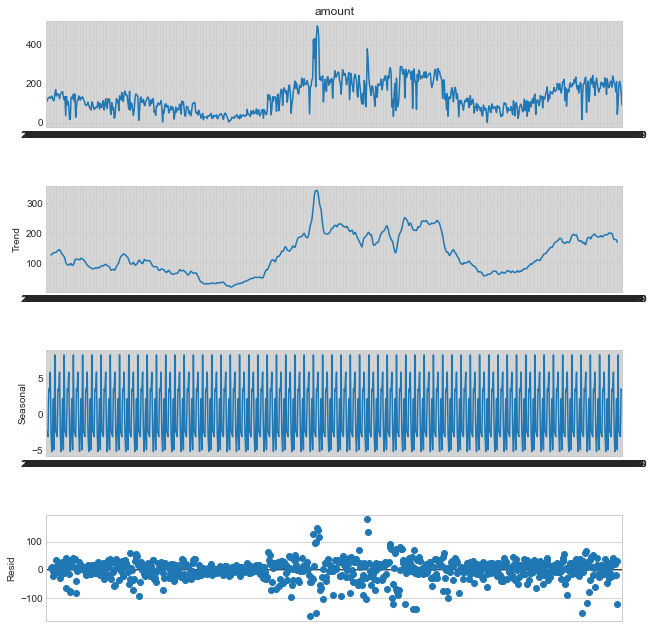

In [355]:
# google trend data
decomposition = sm.tsa.seasonal_decompose(df.amount, model = 'additive', period=12)
fig = decomposition.plot()
plt.xticks([])
fig.set_size_inches(10,10)
plt.show()

## Data Split

In [350]:
val_train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False) 
train_data, valid_data = train_test_split(val_train_data, test_size=1/8, shuffle=False)

print('Train: %f, Validation: %f, Test: %f' % (len(train_data)/len(df), len(valid_data)/len(df), len(test_data)/len(df)))

Train: 0.699599, Validation: 0.100134, Test: 0.200267


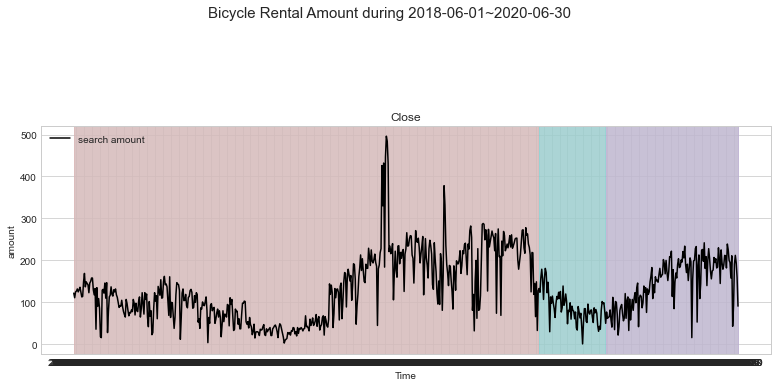

In [354]:
plt.rc('font', size=10)
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(df.amount, color='black', label='search amount')
plt.axvspan(train_data.index[0], train_data.index[-1], alpha=0.2, color='lightcoral')
plt.axvspan(valid_data.index[0], valid_data.index[-1], alpha=0.2, color='darkturquoise')
plt.axvspan(test_data.index[0], test_data.index[-1], alpha=0.2, color='mediumpurple')
#plt.text(1, 1,'Train')
#plt.text(14, -2, 'Validation', ha='center')
#plt.text(14, -2, 'Test', ha='center')
ax.set_xlabel('Time')
ax.set_ylabel(df.columns[0])
ax.set_title('Close')
ax.legend(loc='upper left')

plt.suptitle("Bicycle Rental Amount during "+str(df.index[0])+'~'+str(df.index[-1:][0]), fontsize=15)
fig.tight_layout(pad=5)
plt.show()

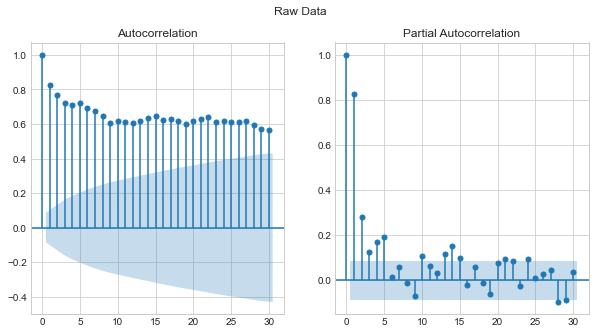

In [356]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1])
plt.show()

In [358]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(train_data['amount'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.066057e+00
p-value                        5.077251e-10
#Lags Used                     0.000000e+00
Number of Observations Used    5.230000e+02
Critical Value (1%)           -3.442915e+00
Critical Value (5%)           -2.867082e+00
Critical Value (10%)          -2.569722e+00
dtype: float64


In [361]:
diff_train_data = train_data.copy()
diff_train_data = diff_train_data.amount.diff()
diff_train_data = diff_train_data.dropna()  
print('------<Raw data>------')
print(train_data)
print('------<Differenced data>------')
print(diff_train_data)

------<Raw data>------
            amount
date              
2018-06-01     122
2018-06-02     111
2018-06-03     125
2018-06-04     127
2018-06-05     132
...            ...
2019-11-14     145
2019-11-15      66
2019-11-16     149
2019-11-17      33
2019-11-18     128

[524 rows x 1 columns]
------<Differenced data>------
date
2018-06-02    -11.0
2018-06-03     14.0
2018-06-04      2.0
2018-06-05      5.0
2018-06-06     -7.0
              ...  
2019-11-14     26.0
2019-11-15    -79.0
2019-11-16     83.0
2019-11-17   -116.0
2019-11-18     95.0
Name: amount, Length: 523, dtype: float64


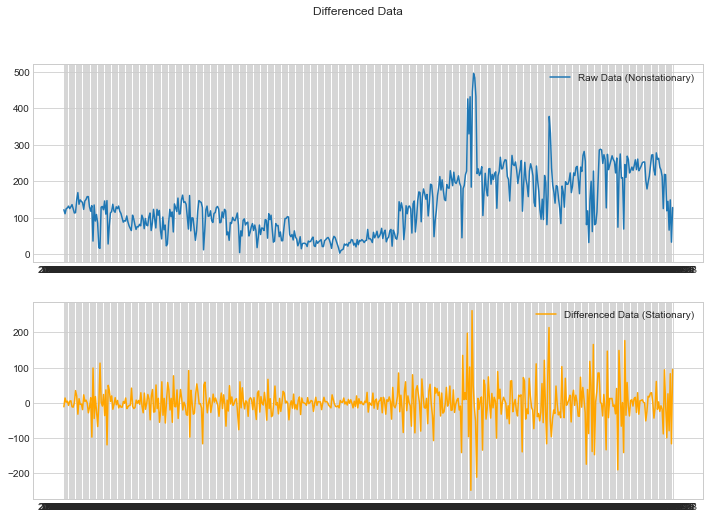

In [362]:
plt.figure(figsize=(12, 8))
plt.suptitle('Differenced Data')
plt.subplot(211)
plt.plot(train_data.amount)
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data, 'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()

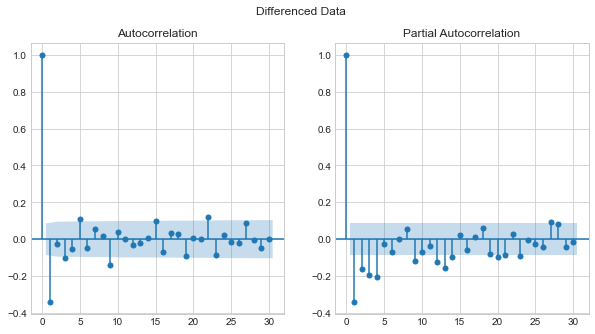

In [363]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1])
plt.show()

In [364]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(diff_train_data)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -1.016663e+01
p-value                        7.270179e-18
#Lags Used                     1.300000e+01
Number of Observations Used    5.090000e+02
Critical Value (1%)           -3.443263e+00
Critical Value (5%)           -2.867235e+00
Critical Value (10%)          -2.569803e+00
dtype: float64


## Model

In [366]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data,
                order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               amount   No. Observations:                  524
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -2707.334
Date:                              Wed, 02 Dec 2020   AIC                           5420.669
Time:                                      17:41:13   BIC                           5433.378
Sample:                                           0   HQIC                          5425.651
                                              - 524                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3420      0.026    -13.391      0.000      -0.392      -0.292
ma.S.L12      -0.9986      0.737     -1.355      0.175      -2.443       0.446
sigma2      2145.0889   1551.161      1.383      0.167    -895.130    5185.308
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):               515.51
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               3.46   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [368]:
prediction = results.get_forecast(len(valid_data))
predicted_value= prediction.predicted_mean
predicted_ub = prediction.conf_int()['upper amount']
predicted_lb = prediction.conf_int()['lower amount']
predict_index = list(valid_data.index)
mse = mean_squared_error(valid_data, predicted_value)
r2 = r2_score(valid_data, predicted_value)
print(mse, r2)

1839.745561556955 -0.423596337117625


Text(0.5, 0.98, 'SARIMA (1, 1, 0) Prediction Results (MSE: 1839.75)')

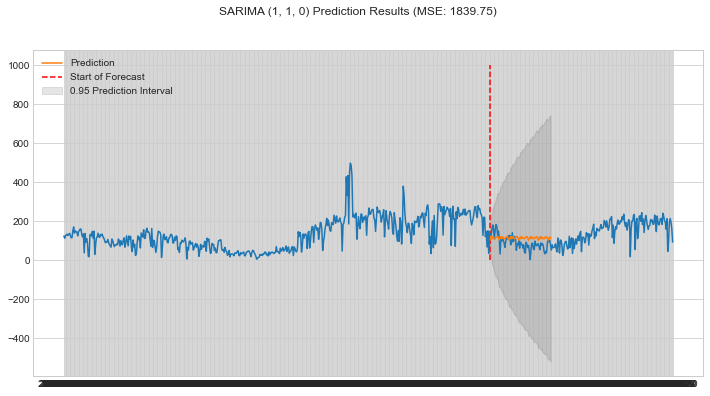

In [370]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(df.index, df.values)
ax.vlines(predict_index[0], 0, 1000, linestyle='--', color='r', label = 'Start of Forecast')
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label = '0.95 Prediction Interval')
ax.legend(loc='upper left')
#plt.ylim(80, 160)
plt.suptitle(f'SARIMA (1, 1, 0) Prediction Results (MSE: {round(mse, 2)})')